# **Heart Attack Classification**

Heart attack has been a universal problem in this modern world. Heart disease comes from different factors, and suffering from a heart attack is so dangerous that, one individual one second before still living normally, but a few moments after heart attack, become disabled in some aspects, with the worst case is death. Therefore, it is a good thing, to see if some details of a patent might affect the rate of an individual's chance of suffering a heart attack.

# **Goal and strategies**

The main goal in this project is to use the existing data of patents, to train model that can classify if there is a yes or no to whether a patent might suffer from a heart attack. Since this is a classification problem, there are some modeling approach we can use here, including:

- Support Vector Machine (SVM)
- Logistic Regression
- Decision Tree
- K Nearest Neighbors

Some ensembling techniques:
- Random Forest Classifier
- Gradient Boosting Classifier

Before doing this, I would also like to do some exploration to the existing data to find out some relationship between each variables to the target output, and how does the data distributed.

# **1. Import libraries**

In [2]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Scaling and model selection
from sklearn.preprocessing import MinMaxScaler
# Train test split
from sklearn.model_selection import train_test_split

# Base model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

# **2. Read in the data**


- `age`: age of the patient

- `sex`: sex of the patient (1 = male, 0 = female)

- `exang`: exercise induced angina (1 = yes; 0 = no)

- `cp` : Chest Pain type chest pain type
  - 1: typical angina
  - 2: atypical angina
  - 3: non-anginal pain
  - 4: asymptomatic

- `trtbps` : resting blood pressure (in mm Hg)

- `chol` : cholestoral in mg/dl fetched via BMI sensor

- `fbs` : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- `restecg` : resting electrocardiographic results

  - 0: normal
  - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- `thalachh` : maximum heart rate achieved



- `oldpeak` : Previous peak

- `slp` : Slope

- `caa` : number of major vessels (0-3)

- `thall` : Thall rate

- `output` : 0 = less chance of heart attack 1 = more chance of heart attack


In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **3. Exploratory Data Analysis**

To make the EDA process looks more comprehensive, first, we can divide the data into categorical variables, continuous, and the target variable.

In [4]:
continuous = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
target = ['output']

## **3.1. Basic metrics**

Data shape

In [6]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
(303, 14)


Check for n/a values

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## **3.2. Visualizations**

### **3.2.1. Univariate visualizations**

First of all, let's explore the distributions of some variables in the dataset

How does the continuous variables distributed in the dataset?

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trtbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'thalachh'}>,
        <AxesSubplot:title={'center':'oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

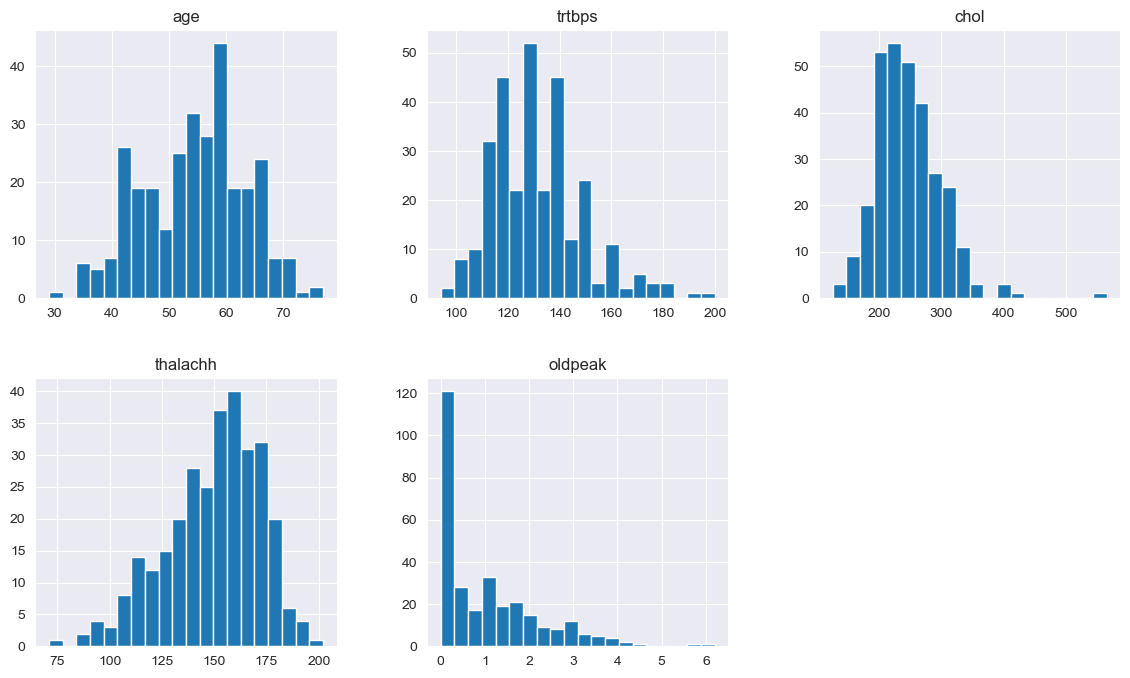

In [11]:
df[continuous].hist(bins=20,layout=(2,3),figsize=(14,8))

Categorical variables

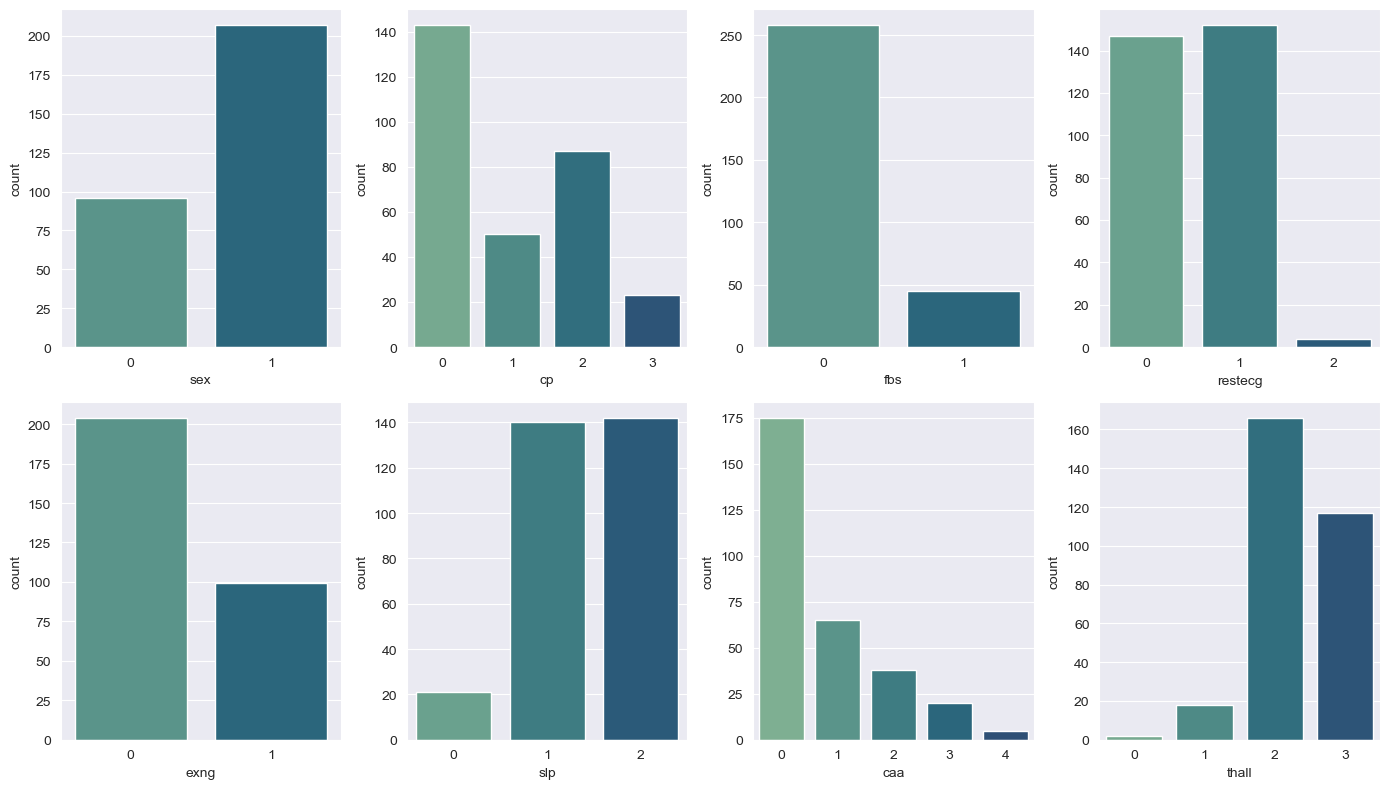

In [12]:
f,axs = plt.subplots(2,4,figsize=(14,8))
for i,ax in enumerate(axs.flatten()):
    # Plot the data
    sb.countplot(data=df, x=categorical[i],ax=ax, palette = "crest")

plt.tight_layout()

### **3.2.2. Bivariate visualizations**

Correlation map and heatmap

<AxesSubplot:>

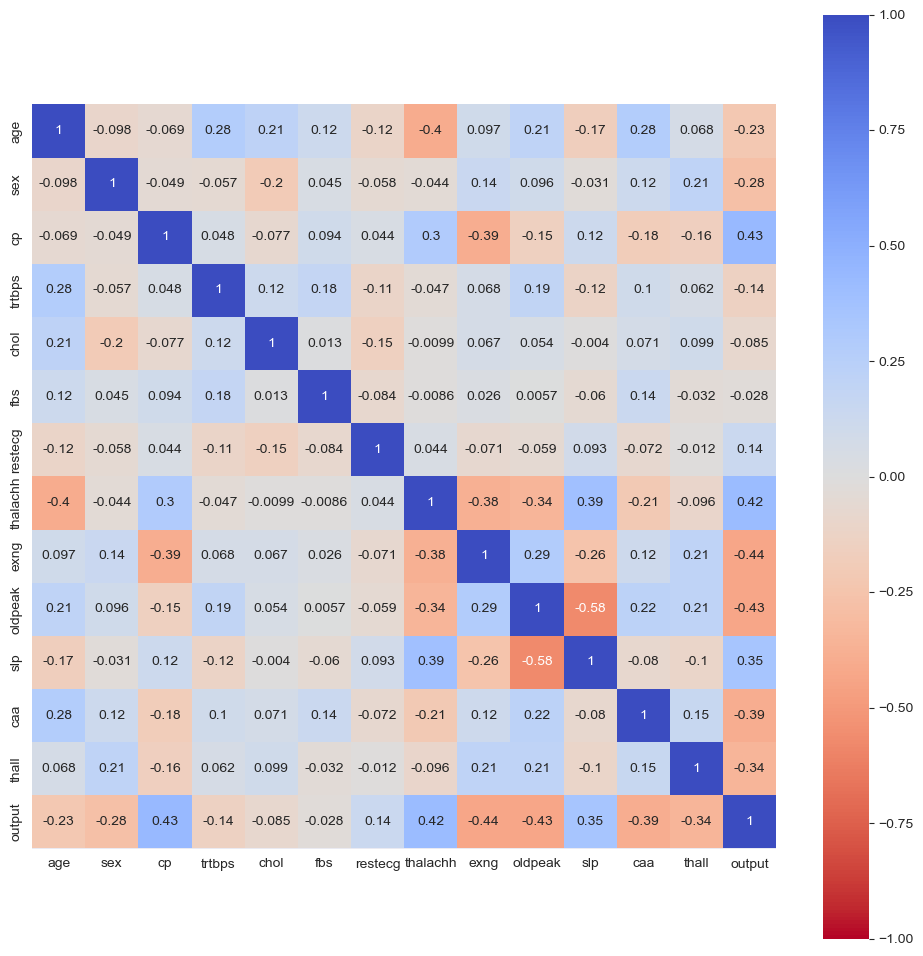

In [13]:
df_corr = df.corr()
# Set up the plotting environment
f,ax = plt.subplots(1,1,figsize=(12,12))

# Make a heatmap, masking the upper triangle
sb.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,ax=ax,cmap='coolwarm_r')

How does continuous variables relates to the target?

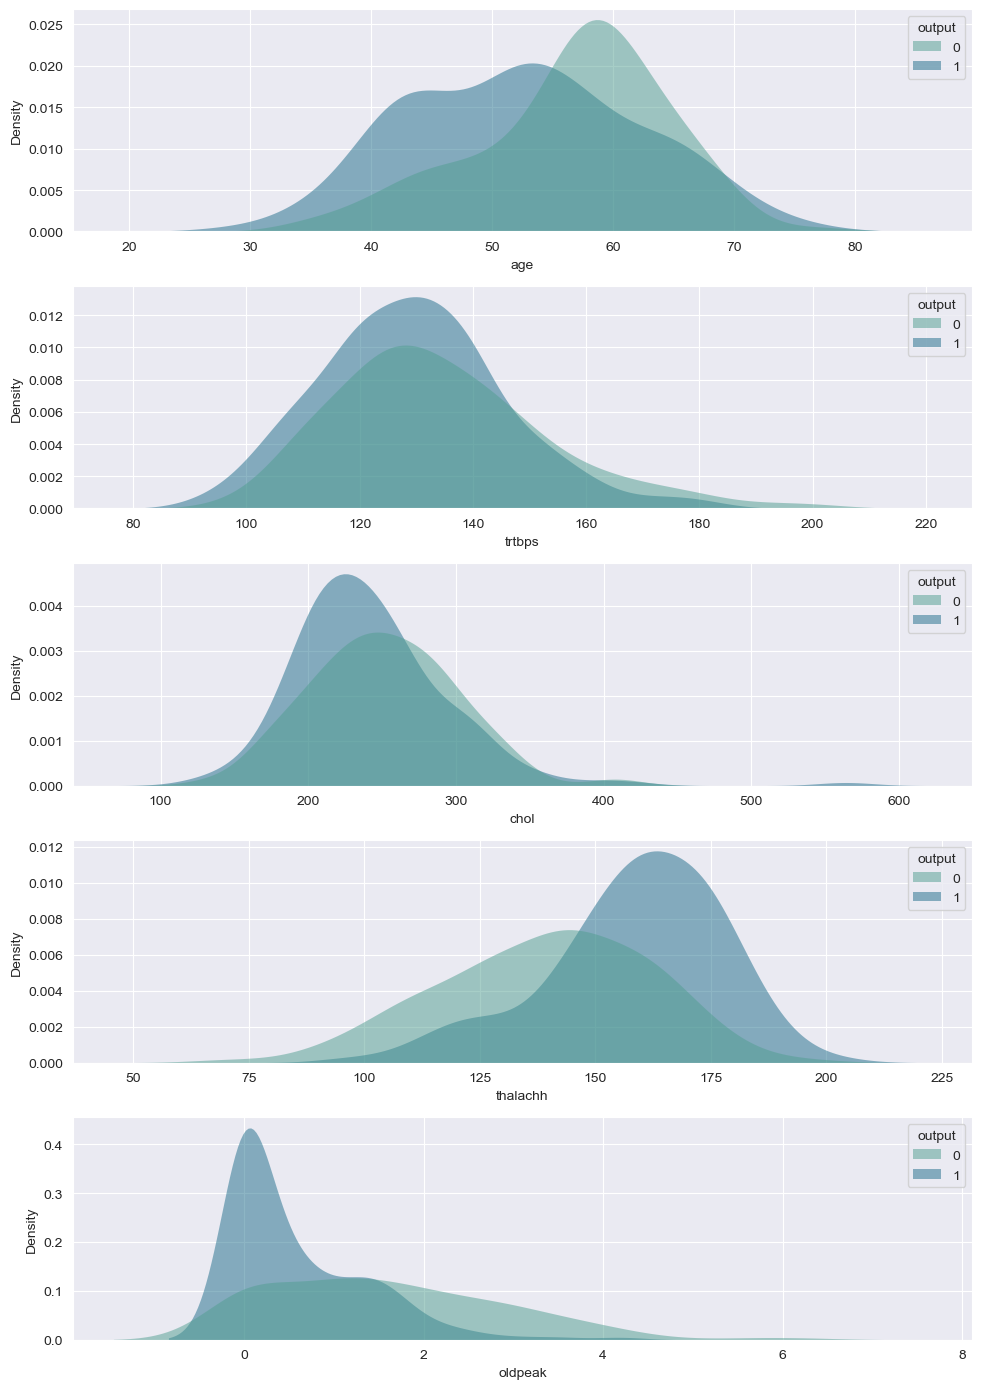

In [17]:
f,axs = plt.subplots(5,1,figsize=(10,14))
for i,ax in enumerate(axs.flatten()):
    # Plot the data
    sb.kdeplot(ax = ax, data=df, x=continuous[i],hue="output", fill=True, palette="crest", alpha=.5, linewidth=0)

plt.tight_layout()

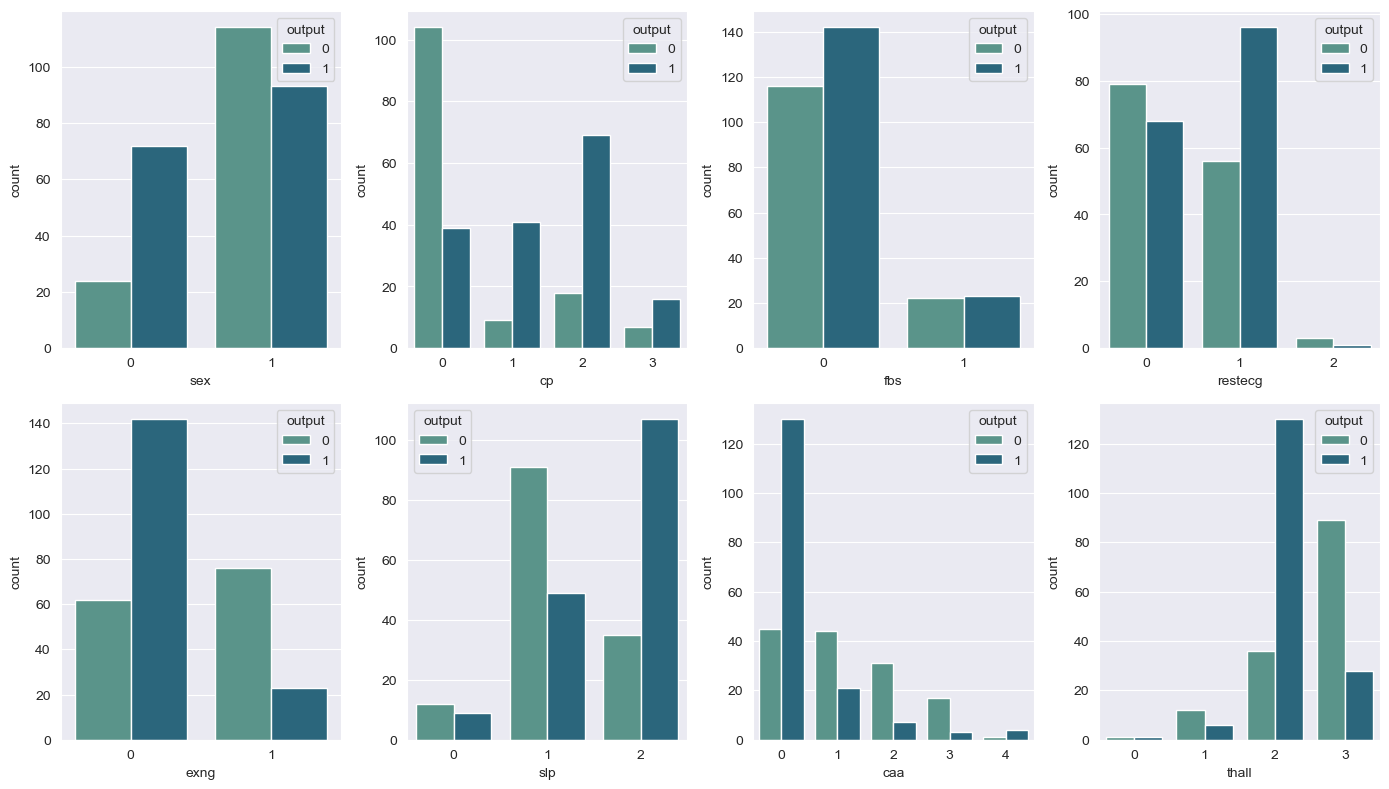

In [18]:
f,axs = plt.subplots(2,4,figsize=(14,8))

for i,ax in enumerate(axs.flatten()):
    # Plot the data
    sb.countplot(data=df, x=categorical[i],ax=ax, palette = "crest", hue = "output")

plt.tight_layout()

# **4. Feature Engineering**

# **5. Prediction Model**

## **5.1. Support vector machine (SVM)**

## **5.2. Logistic Regression**

## **5.3. Decision Tree Classifier**

## **5.4. K Nearest Neighbors**

## **5.5. Random Forest Classifier**

## **5.6. Gradient Boosting Classifier**

# **6. Conclusion**